In [1]:
from pylab import *
from numpy import NaN
from matplotlib.colors import LogNorm

dr, dx = .001, .001
max_it = 1000000

R = arange(2.4, 4, dr)
X = arange(0, 1, dx)
Z = zeros((len(X), len(R)))

In [2]:
for ir, r in enumerate(R):
	if(ir % 500 == 0): print (ir, "of", len(R))
	z = .25
	for i in range(1000):
		z = r * z * (1 - z)
	for i in range(max_it):
		z = r * z * (1 - z)
		Z[-int(z / dx), ir] += 1
	Z[:, ir] *= count_nonzero(Z[:, ir])

Z = where(Z > 0, Z, NaN)
# save("logmap", Z)	# save array to file

0 of 1600
500 of 1600
1000 of 1600
1500 of 1600


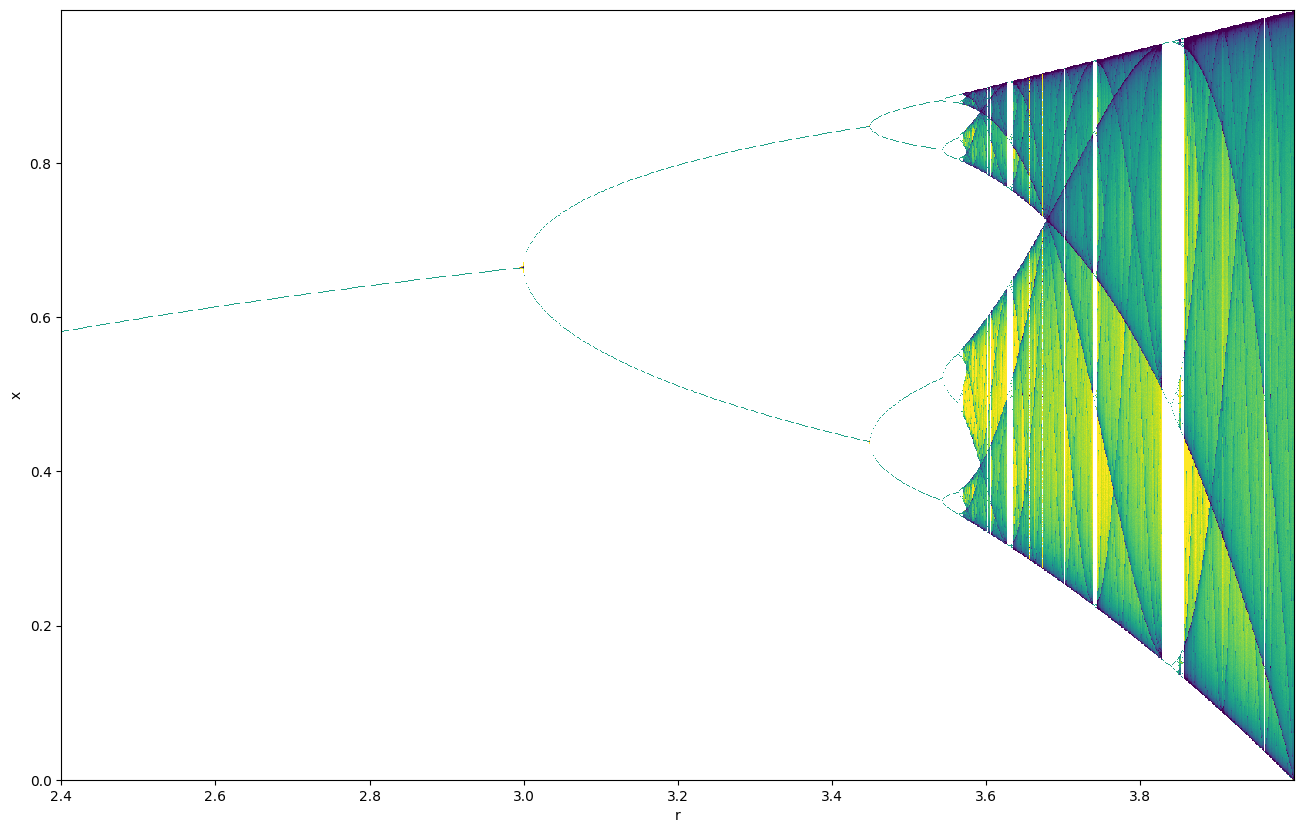

In [4]:
plt.figure(figsize=(20,10))

# pick color bar range:
zmi = .005 * nanmax(Z)
zma = .1   * nanmax(Z)

imshow(Z, cmap = plt.cm.viridis_r,
  interpolation = 'none', norm = LogNorm(vmin = zmi, vmax = zma),
  extent = (R.min(), R.max(), X.min(), X.max()))
xlabel("r")
ylabel("x")
savefig("Logistic Map Bifurcation Diagram, Matplotlib.svg")
show()